<a href="https://colab.research.google.com/github/MusaibSyd/Machine-learning/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')

In [5]:
X = df.drop('sales', axis=1)
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)

In [10]:
poly_features.shape

(200, 9)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
test_predictions = model.predict(X_test)

In [17]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
MAE = mean_absolute_error(y_test,test_predictions)

In [20]:
MSE = mean_squared_error(y_test,test_predictions)

In [21]:
RMSE = np.sqrt(MSE)

In [24]:
MAE, MSE, RMSE

(0.48967980448038373, 0.4417505510403753, 0.6646431757269274)

In [29]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
  poly_converter = PolynomialFeatures(degree=d,include_bias=False)
  poly_features = poly_converter.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

  model = LinearRegression()
  model.fit(X_train,y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_mse = mean_squared_error(y_train,train_pred)
  test_mse = mean_squared_error(y_test,test_pred)

  train_rmse_mse = np.sqrt(train_mse)
  test_rmse_mse = np.sqrt(test_mse)

  train_rmse_errors.append(train_rmse_mse)
  test_rmse_errors.append(test_rmse_mse)

In [30]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.43393443569020695,
 0.3517083688399345,
 0.2509342963181027,
 0.215600223358677,
 5.421577561779074,
 0.14102934100830708,
 0.17154103848027608]

In [31]:
test_rmse_errors

[1.516151937599388,
 0.6646431757269274,
 0.5803286825215619,
 0.5077742637898888,
 2.575814116940382,
 4.337476827861502,
 1379.1716142189634,
 4129.055191519123,
 96107.63985190407]

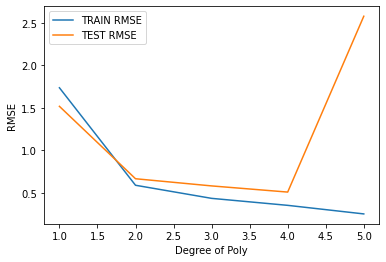

In [33]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_error[:5],label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()